### The code is seperated as functions but to run rock-paper-scissors.py
### use the below command
<python rock-paper-scissors.py 3.jpg>

### Importing the model and necessary packages

In [1]:
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("model/keras_Model.h5", compile=False)

# Load the labels
class_names = open("model/labels.txt", "r").readlines()

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)


### Processing function 

In [2]:
def processing(image_path):
    """
    Prepares an image for model prediction.

    This function loads an image from the specified path, resizes it to 
    224x224 pixels, normalizes its pixel values, and converts it into 
    a numpy array suitable for input into a neural network.

    Args:
        image_path (str): The file path to the image to be processed.

    Returns:
        np.ndarray: A normalized numpy array representing the image, 
                    with shape (224, 224, 3).
    """
    # Replace this with the path to your image
    image = Image.open(image_path).convert("RGB")

    # resizing the image to be at least 224x224 and then cropping from the center
    size = (224, 224)
    image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

    # turn the image into a numpy array
    image_array = np.asarray(image)

    # Normalize the image
    normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

    return normalized_image_array
# Replace this with the path to your image



### Prediction function

In [3]:

def predict(image_path):
    """
    Makes a prediction on the processed image using the trained model.

    This function loads an image, processes it, and then uses the 
    loaded model to make a prediction. It prints the predicted class 
    and the associated confidence score.

    Args:
        image_path (str): The file path to the image to be predicted.
        
    Returns:
        None: This function prints the predicted class and confidence score directly.
    """
    # Load the image into the array
    data[0] = processing(image_path)

    # Predicts the model
    prediction = model.predict(data)
    index = np.argmax(prediction)
    class_name = class_names[index]
    confidence_score = prediction[0][index]

    # Print prediction and confidence score
    print("Class:", class_name[2:], end="")
    print("Confidence Score:", confidence_score)
    

### Displays image with output

1/1 [==============================] - 1s 841ms/step


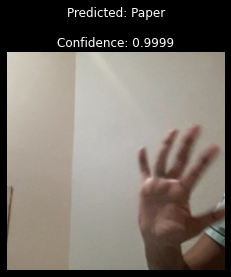

In [4]:
import matplotlib.pyplot as plt

def show_image(image_path, class_name, confidence_score):
    """
    Displays the image with the predicted class and confidence score.

    Args:
        image_path (str): The file path to the image.
        class_name (str): The predicted class name.
        confidence_score (float): The confidence score of the prediction.
    
    Returns:
        None
    """
    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Predicted: {class_name}\nConfidence: {confidence_score:.4f}")
    plt.show()

# Example usage of show_image
image_path = "Samples/Paper/4.jpg"
data[0] = processing(image_path)
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index][2:]
confidence_score = prediction[0][index]

show_image(image_path, class_name, confidence_score)

### Testing the image

In [5]:
predict("Samples/Paper/4.jpg")

1/1 [==============================] - 0s 45ms/step
Class: Paper
Confidence Score: 0.99987483
